Taking an old cost-effectiveness analysis by Charity Entrepreneurship on alcohol taxation (https://docs.google.com/spreadsheets/d/1McM8tcNOnYwcHshBtrb4WSfyc2AvroWxRoz05OOF_Uw/edit#gid=339262567), that included a Monte-Carlo simulation based on estimated uncertainty in the inputs, we will explore different ways to visualize the uncertainty in the results.

In [22]:
import pandas as pd

# The csv has some additional rows and columns which aren't relevant.
# the columns are Trial	Discounted health benefit ($),	Discounted income benefit ($),	Total discounted benefit ($),	Discounted costs ($),	Benefit-cost ratio.
# load the data into a dataframe, take only rows with "Trial" = 1,...,1000.
# index the csv by the "Trial" column.
# rename the columns to be more readable.
simple_column_names = ["Trial", "Health benefit", "Income benefit", "Total benefit", "Costs", "Benefit-cost ratio"]
df = pd.read_csv("./CEA alcohol - taxation - Uncertainty analysis.csv", header=0, skiprows=[1], index_col="Trial", nrows=1000, names=simple_column_names, usecols=range(0, 6))

In [23]:
df.head()

,Health benefit,Income benefit,Total benefit,Costs,Benefit-cost ratio
Trial,,,,,
1,"$140,511,765","$29,629,979","$170,141,744","$1,646,412",103.3
2,"$23,619,766","$6,974,307","$30,594,073","$1,430,469",21.4
3,"$479,130,333","$161,824,612","$640,954,945","$2,114,603",303.1
4,"$228,226,668","$70,130,047","$298,356,714","$1,781,439",167.5
5,"$31,491,336","$13,263,039","$44,754,375","$1,426,108",31.4


In [30]:
# convert values from dollars to numbers
df[df.columns[:-1]] = df[df.columns[:-1]].replace('[\$,]', '', regex=True).astype(float)


In [31]:
df.head()

,Health benefit,Income benefit,Total benefit,Costs,Benefit-cost ratio
Trial,,,,,
1,140511765.0,29629979.0,170141744.0,1646412.0,103.3
2,23619766.0,6974307.0,30594073.0,1430469.0,21.4
3,479130333.0,161824612.0,640954945.0,2114603.0,303.1
4,228226668.0,70130047.0,298356714.0,1781439.0,167.5
5,31491336.0,13263039.0,44754375.0,1426108.0,31.4


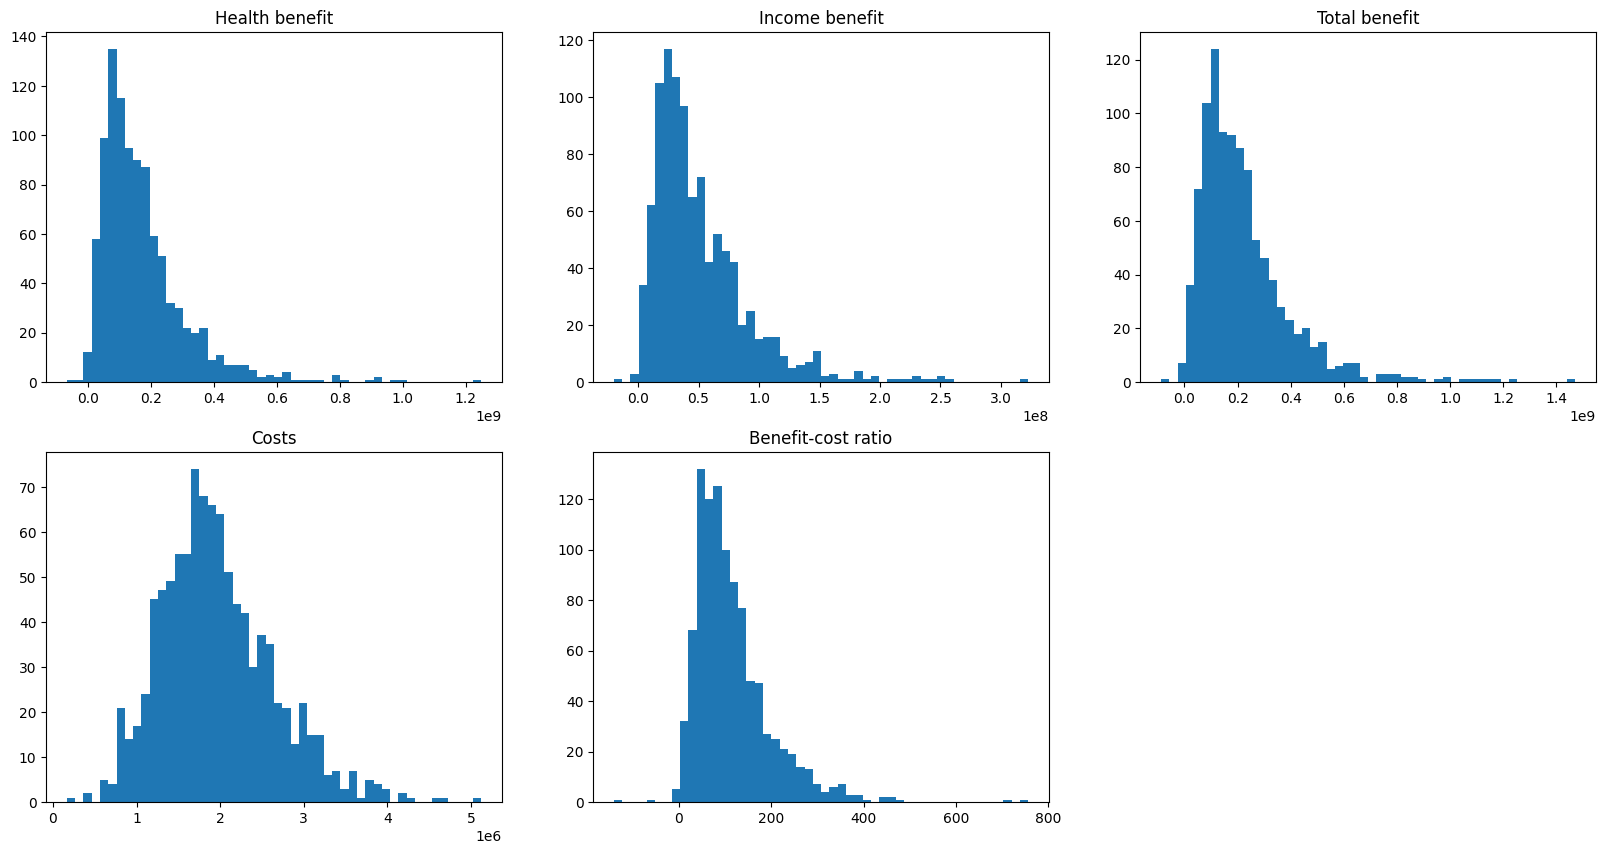

In [32]:
from matplotlib import pyplot as plt

# plot the distributions of the health benefit, income benefit, total benefit, costs, and benefit-cost ratio.
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.hist(df["Health benefit"], bins=50)
plt.title("Health benefit")
plt.subplot(2, 3, 2)
plt.hist(df["Income benefit"], bins=50)
plt.title("Income benefit")
plt.subplot(2, 3, 3)
plt.hist(df["Total benefit"], bins=50)
plt.title("Total benefit")
plt.subplot(2, 3, 4)
plt.hist(df["Costs"], bins=50)
plt.title("Costs")
plt.subplot(2, 3, 5)
plt.hist(df["Benefit-cost ratio"], bins=50)
plt.title("Benefit-cost ratio")
plt.show()


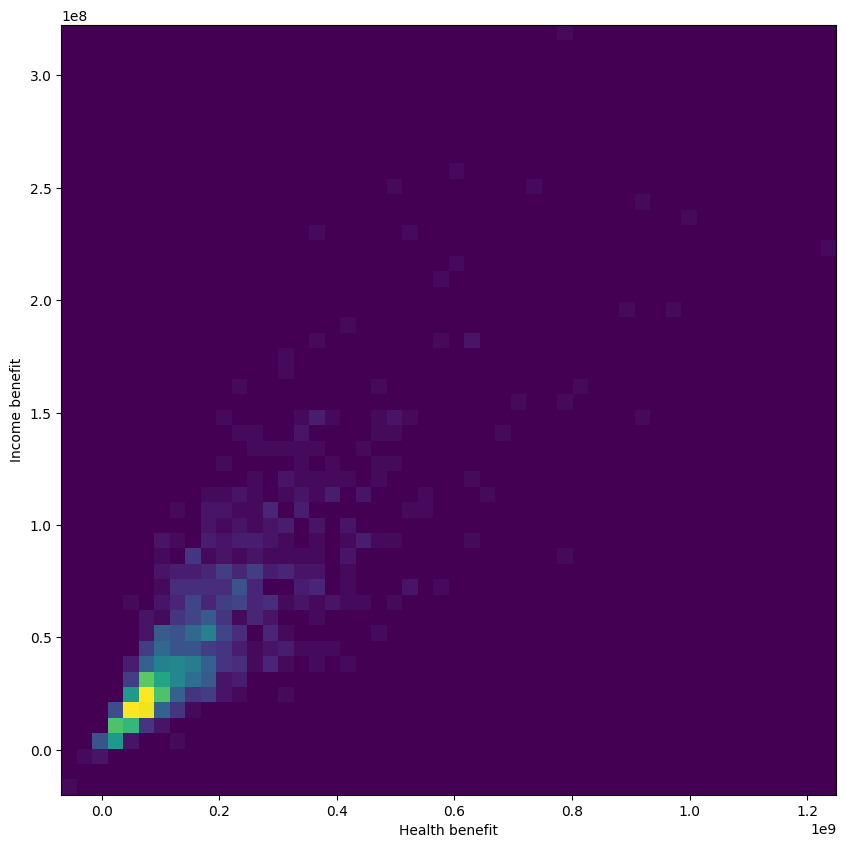

In [33]:
# plot two-dimensional density plot of the health benefit vs. income benefit
plt.figure(figsize=(10, 10))
plt.hist2d(df["Health benefit"], df["Income benefit"], bins=50)
plt.xlabel("Health benefit")
plt.ylabel("Income benefit")
plt.show()

In [35]:
# a simple interactive plot to explore the data, selecting two columns and plotting the common density plot
from ipywidgets import interact

@interact(x=df.columns[:], y=df.columns[:], )
def plot(x, y):
    plt.figure(figsize=(10, 10))
    plt.hist2d(df[x], df[y], bins=50)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()





interactive(children=(Dropdown(description='x', options=('Health benefit', 'Income benefit', 'Total benefit', …